## A winner-take-all network with short-term associative memory

This is an attempt at a non-plastic rate-based model network capable of short-term memory. Each single unit is governed by the equation:

$\tau_i\cfrac{dv_i}{dt} = -v + v^i_{rest} + \sum_j W_{ij}r_j(t) + d^i_{drive}(t) + \eta(t)$,

$r_j(t) = \cfrac{1}{1 + \exp(-g[v_j(t) - v_{th}])}$

where $\tau_i$ is unit $i$'s integration time, $v^i_{rest}$ is the $i$th unit's resting potential, $W$ is a connection weight matrix, $d^i_{drive}(t)$ is the drive to unit $i$ at time $t$, $\eta(t)$ is Gaussian noise, and $g$ and $v_{th}$ are parameters of the transfer function from voltage $v$ to firing rate $r$.

This network is composed of $N$ "fast" units (loosely corresponding to candidate memory items) and $N(N-1)/2$ "slow" triplet-units (corresponding to associative memory gates). Each triplet-unit is itself made up of three single units: one memory unit with a strong self-connection and which is activated upon receiving input from two specific fast units A and B, as well as two "conduit" units receive input from A and B and pass it on to B and A, respectively, if the memory unit is activated. The network also includes one inhibitory unit that has equal incoming connection strengths from all fast units and equal outgoing connection strengths to all fast units. Finally, there is a "switch" unit providing global input to all fast units, which when activated drives the system into a state of random spontaneous activity.

In the figure below, I show how "associating" two fast units (red and black) by driving them sequentially makes this association recallable during later spontaneous activity.

In [1]:
%matplotlib inline
import wta_memory_combo_basic

In [2]:
CONFIG = {
    'SEED': None,
    
    # unit parameters
    'TAU': 3,  # default integration timescale
    'TAU_M': 20,  # integration timescale of memory units
    'TAU_C': 15,  # integration timescale of "conduit" units
    'V_TH': 4,  # voltage threshold in firing rate relation
    'STEEPNESS': 2.5,  # steepness of rate/voltage relation
    'V_REST': 0,  # default resting voltage
    'V_REST_C': -10,  # resting voltage for conduit units (note: this could also be implemented via tonic inhibition)
    
    # weight matrix parameters
    'W_IF': 10,  # to inhibitory from "fast"
    'W_FS': 2.5,  # to fast from "switch"
    'W_FI': -6.5,  # to fast from inhibitory
    'W_FF': 8.5,  # fast self-excitation
    'W_FC': 5.5,  # to fast from conduit
    'W_MF': 6,  # to memory from fast
    'W_MM': 6.5,  # memory self-excitation
    'W_CF': 9,  # to conduit from fast
    'W_CM': 10,  # to conduit from memory

    'N_UNITS': 6,  # number of fast units (these are the ones in which the memory is exhibited)
    
    'NOISE_LEVEL': 1,  # std of gaussian noise added to all units' voltage
    'S_DRIVE_AMP': 10,  # drive to switching unit
    'F1_DRIVE_AMP': 15,  # drive to fast unit 1 (red)
    'F0_DRIVE_AMP': 15,  # drive to fast unit 0 (black)
    
    'T_F1_DRIVE': 50,  # first start time of fast unit 1 drive (first red)
    'D_F1_DRIVE': 10,  # first duration of fast unit 1 drive
    'T_F0_DRIVE': 75,  # first start time of fast unit 0 drive (first black)
    'D_F0_DRIVE': 10,  # first duration of fast unit 0 drive
    'T2_F1_DRIVE': 250,  # second start time of fast unit 1 drive (second red)
    'D2_F1_DRIVE': 10,  # second duration of fast unit 1 drive
    'T2_F0_DRIVE': 350,  # second start time of fast unit 0 drive (second black)
    'D2_F0_DRIVE': 10,  # second duration of fast unit 0 drive
    'T_S_DRIVE': 180,  # start time of switch drive (which moves the network into its spontaneously active mode)
    'DURATION': 500,  # total simulation time
    
    'FONT_SIZE': 20,
    'COLOR_CYCLE': [
             [0, 0, 0],  # black
             [1, 0, 0],  # red
             [0, 1, 0],  # green
             [0, 0, 1],  # blue
             [1, 1, 0],  # yellow
             [1, 0, 1],  # magenta
             [0, 1, 1],  # cyan
             [.5, 0, 0],  # dark red
             [0, .5, 0],  # dark green
             [0, 0, .5],  # dark blue
        ],
}

/Users/rkp/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1644: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


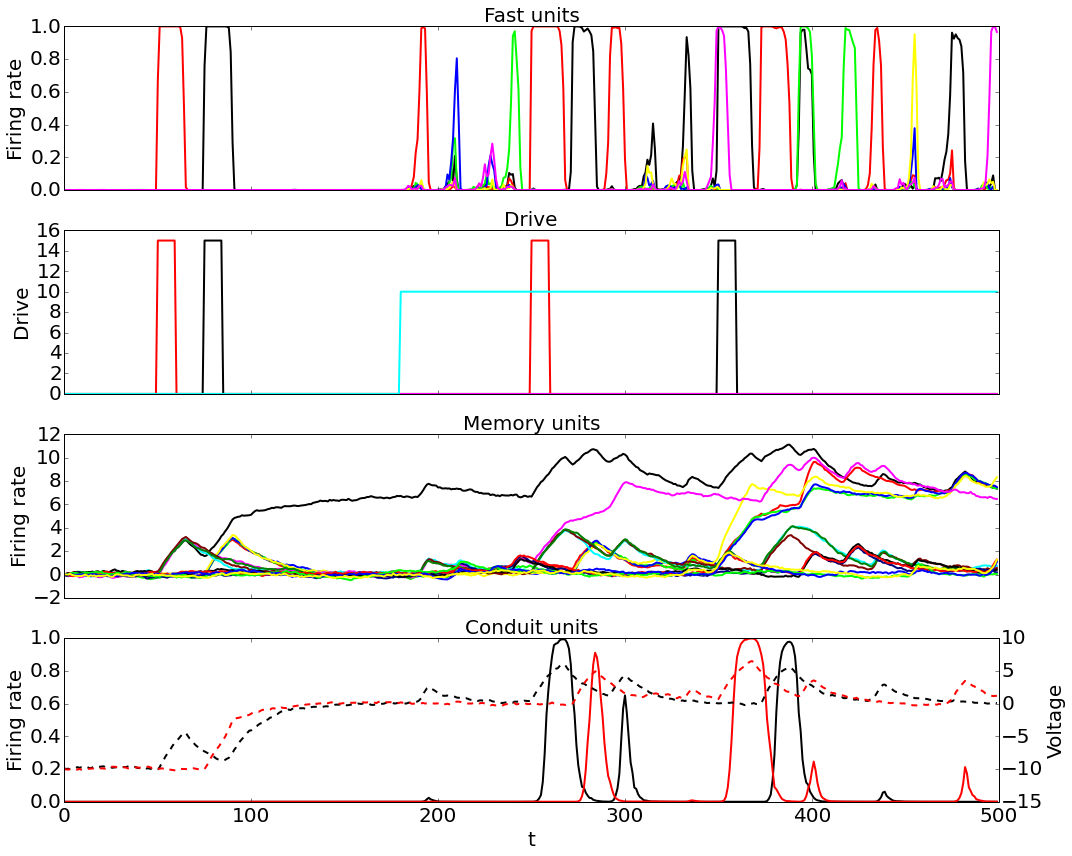

In [3]:
wta_memory_combo_basic.main(CONFIG)